# Weather Data - Data Cleaning and Preprocessing
## Data Science - CS 334
---------------------------------------------------------

### Dataset
- The weather dataset is a messy, real-world dataset containing an entire year’s worth of weather data from Boston, USA. 
- This dataframe has a lot of problems regarding the quality of the data. 
- The goal for this part of the assignment is to clean the data so it can be later used for insightful analysis.

### Importing Libraries
-----------------------------

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns
import re
sns.set()

In [10]:
#Loading data
df = pd.read_csv('weather_start.csv')
print(df.shape)
df.head()

(366, 23)


,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,...,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees,Date
0,'6','Rain','46','29','74','30.45','64','10','22','63',...,'13','40','26','52','30.01','39','10','0.01','268',Year: 2014 Month: 12 Day: 1
1,'7','Rain-Snow','40','29','92','30.71','42','10','24','72',...,'15','27','17','51','30.4','33','2','0.10','62',Year: 2014 Month: 12 Day: 2
2,'8','Rain','49','38','100','30.4','51','10','29','79',...,'12','42','24','57','29.87','37','1','0.44','254',Year: 2014 Month: 12 Day: 3
3,'3',NaN,'24','33','69','30.56','43','10','25','54',...,'12','21','13','39','30.09','30','10','0.00','292',Year: 2014 Month: 12 Day: 4
4,'5','Rain','37','26','85','30.68','42','10','22','66',...,'10','25','12','47','30.45','26','5','0.11','61',Year: 2014 Month: 12 Day: 5


<div style="color: pink; 
            background-color: #b73239;
            border-radius: 5px;
            padding: 5px 5px 5px 5px;
            display: inline-block">
    If you get a `SettingWithCopyWarning:` when using pandas, you can almost always ignore it. 
</div>

## Cleaning Part I: Data Formats and Types

--------------------------------------------------

- We can see the `Date` column has the information in a weird text-based style. So the first order of business is to parse the `Date` column and obtain separate year, month and day columns as integer values.You will use regex for this.Then you will combine these three columns using `pd.to_datetime` to create a datetime column which is a special type in pandas. It gives you some amazing funcitonality.
- Then you have individual weather related measurements (`Max.TemperatureF`, `Max.Dew.PointF` etc) but the values of these columns have quotes around them ('') so these need to be cleaned.
- For the weather related columns you need to fix the types. Pandas documentation is your friend so use it!
- You should also keep an eye out for inconsistent encodings.  Everything is a string, that means encoding issues can be present. These are more common in categorical variables like a column describing gender has both full words (female, male) and letters (f, m). You will need to properly standardise this issue.
- Everything is a string. This is a sign of a long day (maybe not?) of data cleaning ahead. Good Luck!

In [25]:
df['Date'] = df['Date'].str.replace('Year', '')
df['Date'] = df['Date'].str.replace(':', '')
df['Date'] = df['Date'].str.replace('Month', '')
df['Date'] = df['Date'].str.replace('Day', '')
Year = []
Month = []
Day = []
for x in df['Date']:
    y = re.split("  ", x)
    Year.append(y[0])
    Month.append(y[1])
    Day.append(y[2])
df['Year'] = Year
df['Month'] = Month
df['Day'] = Day
df.head()

,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,...,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees,Date,Year,Month,Day
0,'6','Rain','46','29','74','30.45','64','10','22','63',...,'52','30.01','39','10','0.01','268',2014 12 1,2014,12,1
1,'7','Rain-Snow','40','29','92','30.71','42','10','24','72',...,'51','30.4','33','2','0.10','62',2014 12 2,2014,12,2
2,'8','Rain','49','38','100','30.4','51','10','29','79',...,'57','29.87','37','1','0.44','254',2014 12 3,2014,12,3
3,'3',NaN,'24','33','69','30.56','43','10','25','54',...,'39','30.09','30','10','0.00','292',2014 12 4,2014,12,4
4,'5','Rain','37','26','85','30.68','42','10','22','66',...,'47','30.45','26','5','0.11','61',2014 12 5,2014,12,5


In [26]:
df['Date'] = pd.to_datetime(df['Year']+' '+ df['Month']+' '+ df['Day'])
df = df.drop('Year', axis = 1)
df = df.drop('Month', axis = 1)
df = df.drop('Day', axis = 1)
df.head()

,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,...,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees,Date
0,'6','Rain','46','29','74','30.45','64','10','22','63',...,'13','40','26','52','30.01','39','10','0.01','268',2014-12-01
1,'7','Rain-Snow','40','29','92','30.71','42','10','24','72',...,'15','27','17','51','30.4','33','2','0.10','62',2014-12-02
2,'8','Rain','49','38','100','30.4','51','10','29','79',...,'12','42','24','57','29.87','37','1','0.44','254',2014-12-03
3,'3',NaN,'24','33','69','30.56','43','10','25','54',...,'12','21','13','39','30.09','30','10','0.00','292',2014-12-04
4,'5','Rain','37','26','85','30.68','42','10','22','66',...,'10','25','12','47','30.45','26','5','0.11','61',2014-12-05


In [27]:
df['Max.TemperatureF'] = df['Max.TemperatureF'].str.strip('\'')
df['Max.TemperatureF'] =df['Max.TemperatureF'].astype(float)
df['CloudCover'] = df['CloudCover'].str.strip('\'')
df['CloudCover'] =df['CloudCover'].astype(float)
df['Max.Dew.PointF'] = df['Max.Dew.PointF'].str.strip('\'')
df['Max.Dew.PointF'] =df['Max.Dew.PointF'].astype(float)
df['Max.Gust.SpeedMPH'] = df['Max.Gust.SpeedMPH'].str.strip('\'')
df['Max.Gust.SpeedMPH'] =df['Max.Gust.SpeedMPH'].astype(float)
df['Max.Humidity'] = df['Max.Humidity'].str.strip('\'')
df['Max.Humidity'] =df['Max.Humidity'].astype(float)
df['Max.Sea.Level.PressureIn'] = df['Max.Sea.Level.PressureIn'].str.strip('\'')
df['Max.Sea.Level.PressureIn'] =df['Max.Sea.Level.PressureIn'].astype(float)
df['Max.VisibilityMiles'] = df['Max.VisibilityMiles'].str.strip('\'')
df['Max.VisibilityMiles'] =df['Max.VisibilityMiles'].astype(float)
df['Max.Wind.SpeedMPH'] = df['Max.Wind.SpeedMPH'].str.strip('\'')
df['Max.Wind.SpeedMPH'] =df['Max.Wind.SpeedMPH'].astype(float)
df['Mean.Humidity'] = df['Mean.Humidity'].str.strip('\'')
df['Mean.Humidity'] =df['Mean.Humidity'].astype(float)
df['Mean.Wind.SpeedMPH'] = df['Mean.Wind.SpeedMPH'].str.strip('\'')
df['Mean.Wind.SpeedMPH'] =df['Mean.Wind.SpeedMPH'].astype(float)
df['MeanDew.PointF'] = df['MeanDew.PointF'].str.strip('\'')
df['MeanDew.PointF'] =df['MeanDew.PointF'].astype(float)
df['Min.DewpointF'] = df['Min.DewpointF'].str.strip('\'')
df['Min.DewpointF'] =df['Min.DewpointF'].astype(float)
df['Min.Humidity'] = df['Min.Humidity'].str.strip('\'')
df['Min.Humidity'] =df['Min.Humidity'].astype(float)
df['Min.Sea.Level.PressureIn'] = df['Min.Sea.Level.PressureIn'].str.strip('\'')
df['Min.Sea.Level.PressureIn'] =df['Min.Sea.Level.PressureIn'].astype(float)
df['Min.TemperatureF'] = df['Min.TemperatureF'].str.strip('\'')
df['Min.TemperatureF'] =df['Min.TemperatureF'].astype(float)
df['Min.VisibilityMiles'] = df['Min.VisibilityMiles'].str.strip('\'')
df['Min.VisibilityMiles'] =df['Min.VisibilityMiles'].astype(float)
df['WindDirDegrees'] = df['WindDirDegrees'].str.strip('\'')
df['WindDirDegrees'] =df['WindDirDegrees'].astype(float)
df['Mean.Sea.Level.PressureIn'] = df['Mean.Sea.Level.PressureIn'].str.strip('\'')
df['Mean.Sea.Level.PressureIn'] =df['Mean.Sea.Level.PressureIn'].astype(float)
df['Mean.TemperatureF'] = df['Mean.TemperatureF'].str.strip('\'')
df['Mean.TemperatureF'] =df['Mean.TemperatureF'].astype(float)
df['PrecipitationIn'] = df['PrecipitationIn'].str.replace('T', '0.00')
df['PrecipitationIn'] = df['PrecipitationIn'].str.strip('\'')
df['PrecipitationIn'] =df['PrecipitationIn'].astype(float)
df['Mean.VisibilityMiles'] = df['Mean.VisibilityMiles'].str.strip('\'')
df['Mean.VisibilityMiles'] =df['Mean.VisibilityMiles'].astype(float)
df['Events'] = df['Events'].replace(np.nan, 'None')
df['Events'] = df['Events'].str.strip('\'')
df['Events'] =df['Events'].astype('category')
print(df.shape)
print(df.dtypes)
df.head()

(366, 23)
CloudCover                          float64
Events                             category
Max.Dew.PointF                      float64
Max.Gust.SpeedMPH                   float64
Max.Humidity                        float64
Max.Sea.Level.PressureIn            float64
Max.TemperatureF                    float64
Max.VisibilityMiles                 float64
Max.Wind.SpeedMPH                   float64
Mean.Humidity                       float64
Mean.Sea.Level.PressureIn           float64
Mean.TemperatureF                   float64
Mean.VisibilityMiles                float64
Mean.Wind.SpeedMPH                  float64
MeanDew.PointF                      float64
Min.DewpointF                       float64
Min.Humidity                        float64
Min.Sea.Level.PressureIn            float64
Min.TemperatureF                    float64
Min.VisibilityMiles                 float64
PrecipitationIn                     float64
WindDirDegrees                      float64
Date                  

,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,...,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees,Date
0,6.0,Rain,46.0,29.0,74.0,30.45,64.0,10.0,22.0,63.0,...,13.0,40.0,26.0,52.0,30.01,39.0,10.0,0.01,268.0,2014-12-01
1,7.0,Rain-Snow,40.0,29.0,92.0,30.71,42.0,10.0,24.0,72.0,...,15.0,27.0,17.0,51.0,30.40,33.0,2.0,0.10,62.0,2014-12-02
2,8.0,Rain,49.0,38.0,100.0,30.40,51.0,10.0,29.0,79.0,...,12.0,42.0,24.0,57.0,29.87,37.0,1.0,0.44,254.0,2014-12-03
3,3.0,None,24.0,33.0,69.0,30.56,43.0,10.0,25.0,54.0,...,12.0,21.0,13.0,39.0,30.09,30.0,10.0,0.00,292.0,2014-12-04
4,5.0,Rain,37.0,26.0,85.0,30.68,42.0,10.0,22.0,66.0,...,10.0,25.0,12.0,47.0,30.45,26.0,5.0,0.11,61.0,2014-12-05


## Distributions + Removing outliers + Imputing missing values

-----------------------------------------------------------------

- Now, you can start the process of data cleaning and exploration as these two things go hand-in-hand. Look for missing values and outliers. You can use different methods to find these problem points using visual methods like plots or analytical methods like summary statistics. 
- Look at what plots can be used to find outliers. Which columns have outliers? What are those values? What did you to process them?
- Which columns have missing values? Find all the columns of possible missing values and impute them using the correct method.
- Check for positive and negative values for all columns. Is there any value which is not allowed to be in a column? What can be done to correct these?

Your dataset should look like `weather_clean.pkl` file at the end. Use it as a refrence.

Let's take a look at our final cleaned dataset before saving it for analysis. We will save it as a 'pickle', a binary file format which will preserve out column types. Text-based file formats like csv and json do not preserve column data types. 

In [28]:
# df.head()
# How many null values -> 6
df.isnull().sum().sum()
# Finding which columns have null values -> Max.Gust.SpeedMPH
df.isnull().sum() 
# replacing null values with median -> 25.5
Median = df['Max.Gust.SpeedMPH'].median()
df['Max.Gust.SpeedMPH'] = df['Max.Gust.SpeedMPH'].replace(np.nan, Median)
# How many null values -> 0
df.isnull().sum().sum()
df.shape

(366, 23)

Outliers


Column name:  Max.Gust.SpeedMPH
Value Index
52.0 9
49.0 36
48.0 62
51.0 77
51.0 107
52.0 108
48.0 112
49.0 125
94.0 142
0.0 209
51.0 247


Column name:  Max.Humidity
Value Index
39.0 109
40.0 122
39.0 136
1000.0 142


Column name:  Max.Sea.Level.PressureIn
Value Index
30.88 360
30.87 361


Column name:  Max.VisibilityMiles
Value Index
2.0 24
4.0 58
7.0 70
4.0 71
6.0 130
6.0 183
7.0 210


Column name:  Max.Wind.SpeedMPH
Value Index
38.0 9
37.0 36
38.0 107
37.0 125
38.0 209
38.0 247


Column name:  Mean.Sea.Level.PressureIn
Value Index
30.69 90
30.76 360
30.77 361


Column name:  Mean.VisibilityMiles
Value Index
4.0 6
2.0 9
3.0 10
1.0 24
4.0 35
3.0 55
1.0 58
2.0 64
2.0 70
1.0 71
3.0 77
4.0 104
4.0 118
2.0 130
4.0 131
3.0 183
-1.0 200
3.0 210
4.0 264
3.0 266
4.0 346


Column name:  Mean.Wind.SpeedMPH
Value Index
22.0 36
22.0 58
22.0 62
21.0 77
22.0 108
22.0 307


Column name:  Min.Sea.Level.PressureIn
Value Index
29.16 55
30.64 361


Column name:  PrecipitationIn
Value Index
0.

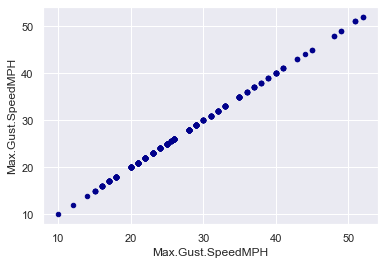

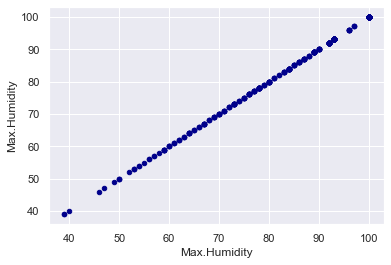

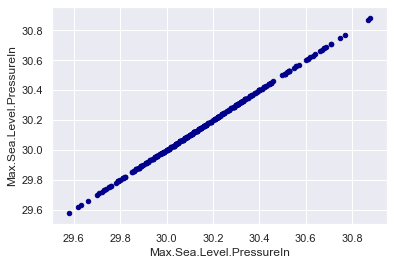

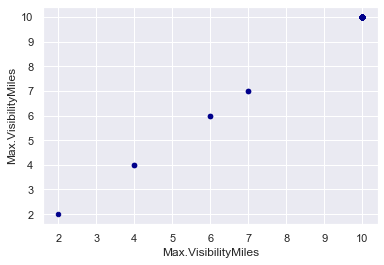

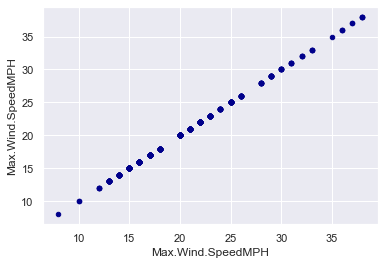

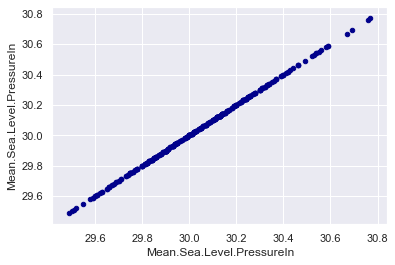

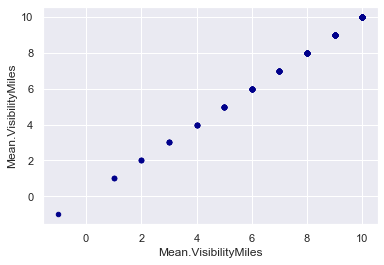

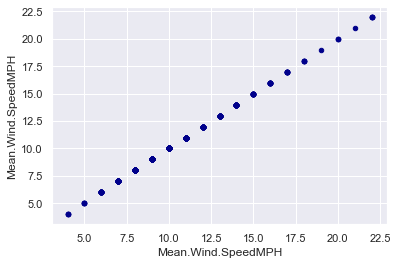

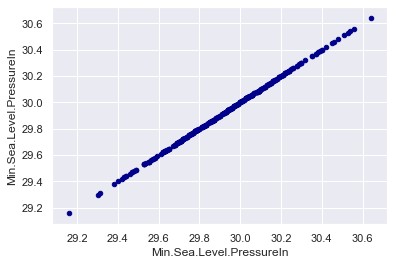

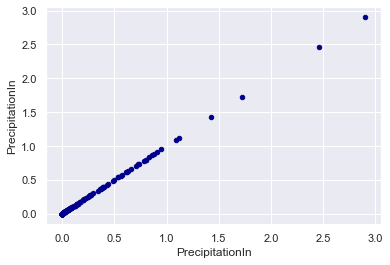

In [29]:
# Outliers
q75 = df.quantile(.75)
q25 = df.quantile(.25)
OutlierWithCorrespondingColumns = []
for col in df:
    if not col == 'Events' and not col == 'Date':
        Q25 = q25[col]
        Q75 = q75[col]
        IQR = Q75 - Q25
        CUT_OFF = IQR*1.5
        lowerBound = Q25 - CUT_OFF
        upperBound = Q75 + CUT_OFF
        o =[]
        count = 0
        for x in df[col]:
            count = count + 1
            if x < lowerBound or x > upperBound:
                o.append((x, count))
        if not len(o) == 0:
            OutlierWithCorrespondingColumns.append((col, o))
print("Outliers\n\n")       
for x in OutlierWithCorrespondingColumns:
    print("Column name: ",x[0])
    print("Value","Index")
    for y in x[1]:
        print(y[0], y[1])
    print('\n')

print('Max.Gust.SpeedMPH: replacing 0.0 and 94.0 with the median.')
m =  df['Max.Gust.SpeedMPH'].median()
df['Max.Gust.SpeedMPH'] =  df['Max.Gust.SpeedMPH'].replace(0.0, m)
df['Max.Gust.SpeedMPH'] = df['Max.Gust.SpeedMPH'].replace(94.0, m)

print('Max.Humidity: replacing 1000.0 with the median.')
m = df['Max.Humidity'].median()
df['Max.Humidity'] = df['Max.Humidity'].replace(1000.0, m)

for u in OutlierWithCorrespondingColumns:
    ax1 = df.plot.scatter(x = u[0], y = u[0], c = 'DarkBlue' )

In [30]:
# for col in df:
#     if not col == 'Events' and not col == 'Date':
#         ax1 = df.plot.scatter(x = col, y = col, c = 'DarkBlue') 

In [31]:
# Negative and positive values check
# Cloud cover cannot be less than 0 or more than 9 -> no such value
for x in df['CloudCover']:
    if x < 0 or x > 9:
        print(x)
# Max Dew PointF -> can be positive or negative
# Max Gust Speed cannot be negative -> no such value
for x in df['Max.Gust.SpeedMPH']:
    if x < 0:
        print(x)
# Max Humidity cannot be negative -> no such value
for x in df['Max.Humidity']:
    if x < 0:
        print(x)
# Max sea level pressure
for x in df['Max.Sea.Level.PressureIn']:
    if x < 0:
        print(x)
# Max Temperature -> can be positive or negative
# Max visiblity Miles cannot be negative -> no such value
for x in df['Max.VisibilityMiles']:
    if x < 0:
        print(x)
# Max Wind SpeedMPH cannot be negative -> no such value
for x in df['Max.Wind.SpeedMPH']:
    if x < 0:
        print(x)
# MeanDew PointF -> can be negative or positive
# Min DewpointF -> can be negative or positive 
# Min Humidity cannot be negative -> no such values
for x in df['Min.Humidity']:
    if x < 0:
        print(x)
# Min Sea Level PressureIn cannot be negative -> no such values
for x in df['Min.Sea.Level.PressureIn']:
    if x < 0:
        print(x)
# Min.TemperatureF -> can be negative or positive
# Min VisibilityMiles cannot be negative -> no such values
for x in df['Min.VisibilityMiles']:
    if x < 0:
        print(x)
# PrecipitationIn -> can be negative or positive
# WindDirDegrees -> can be negative or positive
# Mean.VisibilityMiles cannot be negative -> one negative value
y = 0
for x in df['Mean.VisibilityMiles']:
    y = y + 1
    if x < 0:
        x = (df['Max.VisibilityMiles'][y] + df['Min.VisibilityMiles'][y]) /2.0
        
# Mean.Humidity cannot be negative -> no such value 
for x in df['Mean.Humidity']:
    if x < 0:
        print(x)
# Mean.Sea.Level.PressureIn cannot be negative -> no such value
for x in df['Mean.Sea.Level.PressureIn']:
    if x < 0: 
        print(x)
# Mean.TemperatureF -> can be negative or positive
# Mean.Wind.SpeedMPH cannot be negative -> no such value
for x in df['Mean.Wind.SpeedMPH']:
    if x < 0:
        print(x)

In [32]:
#save the cleaned dataset
df.to_pickle('weather_clean.pkl')
# cleanedData = pd.read_pickle('weather_clean.pkl')
# # print(cleanedData.shape)
# # print(cleanedData)
# # print(df.shape)
# # print(df)
# for x in cleanedData['Mean.VisibilityMiles']:
#     cleanedData['Mean.VisibilityMiles'][c]
#     if x < 0:
#         print(x)